<a href="https://colab.research.google.com/github/EmanDiab/Data-Analysis-1-Million-arab-coders/blob/master/Assignment_1_Fisher_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Fisher Implementation

<font color=blue><b>1- Import Needed Packages</b></font>

In [0]:
import numpy as np
import os
import imageio
import matplotlib.pylab as plt

### Get the current directory path

In [0]:
home_path = os.getcwd()

<font color=blue><b>2- Load Images </b></font>

In [3]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/assignment_1_fisher/Train/'
os.chdir(path)

Images=os.listdir()
print(type(Images)) # How Does it store
print(Images)
print(len(Images))# To know number of them

#print(Images)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
<class 'list'>
['1356.jpg', '1301.jpg', '1269.jpg', '1357.jpg', '1302.jpg', '127.jpg', '1303.jpg', '1270.jpg', '1358.jpg', '1304.jpg', '1271.jpg', '1359.jpg', '1305.jpg', '1272.jpg', '136.jpg', '1306.jpg', '1273.jpg', '1360.jpg', '1307.jpg', '1274.jpg', '1361.jpg', '1308.jpg', '1362.jpg', '1275.jpg', '1309.jpg', '1363.jpg', '131.jpg', '1276.jpg', '1364.jpg', '1310.jpg', '1277.jpg', '1365.jpg', '1311.jpg', '1366.jpg', '1278.jpg', '1312.jpg', '1367.jpg', '1279.j

<font color=blue><b>3-Sort them and read them </b></font>

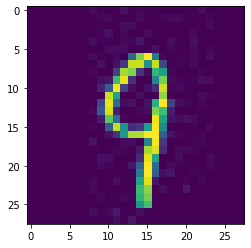

In [5]:
%matplotlib inline
Images1=sorted(Images, key=lambda t: int(os.path.splitext(t)[0])) # sort them ascendingly 
ImagF=np.zeros((2400,784))  # All Images
for i in range(len(Images1)):
    ImagF1=imageio.imread(path + Images1[i])
    ImagF[i,:]=ImagF1.reshape((1,784))
plt.imshow(ImagF1.reshape(28,28)) #To Display it

In [9]:
ImagF

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

the whole data is 2400 and we have 10 classes so every class should have 240 row.

<font color=blue ><b>4-Training Phase (Weights) </b></font> 

In [0]:
def m1(c1):
    #Calculate mean of the intended class 
    #intended class is matix 240*784
    m1 = np.sum(c1, axis=0) / 240
    
    return m1
def m2(c2):
    #Calculate mean of the other classes
    m2 = np.sum(c2, axis=0) /2160
    return m2

In [11]:
b = np.ones((5,5))
l = []
for i in range(len(b)):
    l.append(b[i,:]@ b[i,:].T)
print(l)    

[5.0, 5.0, 5.0, 5.0, 5.0]


In [0]:
def S1(c1,m1):
    # Calculate First Term of SW
    s1_1 = c1 - m1
    #print('chape of c1- m1' + str(s1_1.shape))
    s_l =[]
    for i in range(len(s1_1)):
        s_l.append(s1_1[i,:].reshape(784,1)@ s1_1[i,:].reshape(784,1).T)
    S1_t = sum(s_l)    
        
    return S1_t 
def S2(c2,m2):
    #Calculate Second Term of SW
    s2_2 = c2 - m2
    s_2 =[]
    for i in range(len(s2_2)):
        s_2.append(s2_2[i,:].reshape(784,1)@ s2_2[i,:].reshape(784,1).T)
    S2_t = sum(s_2)  
    
    return S2_t

In [0]:
Images1

['1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '1000.jpg',
 '1001.jpg',
 '1002.jpg',
 '1003.jpg',
 '1004.jpg',
 '1005.jpg',
 '1006.jpg',
 '1007.jpg',
 '1008.jpg',
 '1009.jpg',
 '1010.jpg',
 '1011.jpg',
 '1012.jpg',
 '1013.jpg',
 '1014.jpg',
 '1015.jpg',
 '1016.jpg',
 '1017.jpg',
 '1018.jpg',
 '1019.jpg',
 '1020.jpg',
 '1021.jpg',
 '1022.jpg',
 '1023.jpg',
 '1024.jpg',
 '1025.jpg',
 '1026.jpg',
 '1027.jpg',
 '1028.jpg',
 '1029.jpg',
 '103

In [0]:
b = np.ones((5,5))

a = np.delete(b, [a for a in range(1,3)], axis=0)
a
b

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [13]:
W =[]
W_o=np.zeros((10,1))
counter=0 
for i in range(0,len(Images1),240):
    
    #Get First Class say c1
    c1 = ImagF[i:(i+240),:]
    #Get Other Classes say c2
    c2 = np.delete(ImagF , [a for a in range(i,(i+240))], axis=0)
    #Get Means
    mean1=m1(c1)
    mean2=m2(c2)
    
    #Calculate SW
    Sw=S1(c1,mean1)+S2(c2,mean2)
    #Calculate its invers "Note Use pinv function"
    Sw_inv=np.linalg.pinv(Sw)
    #Calculate Weigths of the intended class 
    w = Sw_inv@(mean1 + mean2)
    W.append(w)
    #Calculate W_bias of it
    
    
    
    counter+=1
W = np.array(W)
W

array([[ 4.05430378e-05, -2.24644559e-04,  1.99172929e-04, ...,
        -3.11039025e-05, -5.18398376e-05,  5.95856209e-06],
       [ 9.59068963e-05, -2.17172678e-04,  2.37739627e-04, ...,
        -2.76436367e-05, -4.60727278e-05,  2.47265411e-05],
       [ 3.26272277e-04, -3.13304507e-04,  1.18978077e-04, ...,
        -6.10250446e-05, -1.01708408e-04, -4.14160914e-06],
       ...,
       [ 1.79883801e-04, -9.14060284e-05,  4.34405865e-04, ...,
        -2.85806107e-05, -4.76343512e-05, -3.16135723e-05],
       [ 4.15793815e-05,  2.90198332e-06,  3.89224630e-04, ...,
         1.18602952e-06,  1.97671587e-06,  3.36728432e-05],
       [ 9.85698355e-05, -2.93691279e-04,  2.21334705e-04, ...,
        -4.06730615e-05, -6.77884358e-05,  3.93846087e-05]])

<font color=blue ><b>5-Testing Phase </b></font>

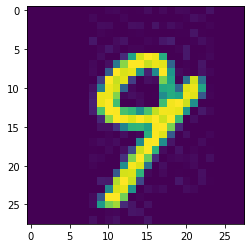

In [17]:
#-----------------Testing---------------
path1 = '/content/drive/My Drive/assignment_1_fisher/'
os.chdir(path1)
Test_Labels=np.loadtxt("Test Labels.txt")
path='/content/drive/My Drive/assignment_1_fisher/Test'
os.chdir(path)
Test_Image=os.listdir()
Test_Image.pop()
Test_Image1=sorted(Test_Image, key=lambda t: int(os.path.splitext(t)[0]))
Imag_T=np.zeros((200,784))
for i in range(len(Test_Image1)):
    Imag=imageio.imread( Test_Image1[i])
    Imag_T[i,:]=Imag.reshape((1,784)) 
plt.imshow(Imag.reshape(28,28))   
# Calculate Predicted Y 

# Calculate Predicted Labels


#Calculate Accuracy and Print it


#Plot Confusion Matrix and save it but take care to save it in another folder NOT TRAIN or TEST
